In [24]:
os.environ.get('MPB_PYTHON_BINARY', './benchmark')

'../../../scripts/run_bench_mr.py'

In [1]:
import pathlib
project_path = pathlib.Path().resolve().parent.parent
paths = []

import sys
path = project_path.joinpath("benchmark/third_party/bench-mr/python").as_posix()
if path not in sys.path:
    sys.path.append(path)

import os
os.environ["MPB_BINARY"] = "./benchmark"
os.environ["MPB_PYTHON_BINARY"] = "../../../scripts/run_bench_mr.py"
os.environ["MPB_BINARY_DIR"] = "/home/evgeny/pytorch-motion-planner/benchmark/third_party/bench-mr/bin"
os.environ["PYTHONPATH"] = "../../../build/benchmark:" + project_path.as_posix()


import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42

from plot_env import plot_env
import json
from plot_env import plot_env, plot_env_options
from plot_trajectory import plot_trajectory, plot_nodes, plot_trajectory_options
from color import get_color, get_colors
import matplotlib.pyplot as plt
from mpb import MPB, MultipleMPB
from plot_stats import plot_planner_stats

%config InlineBackend.figure_format='retina'

In [2]:
MPB_BINARY = os.environ.get("MPB_BINARY", './benchmark')
MPB_BINARY_DIR = os.environ.get("MPB_BINARY_DIR", '../bin')
MPB_PYTHON_BINARY = os.environ.get("MPB_PYTHON_BINARY", "./benchmark")
MPB_PYTHON_BINARY

'../../../scripts/run_bench_mr.py'

# Run one experiment

In [3]:
# scenario = (
#     {"theta": -1.58, "x": 7.5, "y": -10},
#     {"theta": -1.58, "x": 116, "y": -70},
#     "warehouse2",
#     "polygon_mazes/warehouse_robot.svg",
# )
scenario = (
    {"theta": 0, "x": 2, "y": -7.27},
    {"theta": -1.58, "x": 9, "y": -11.72},
    "parking1",
    "polygon_mazes/car.svg",
)
m = MPB()
m["env.start"] = scenario[0]
m["env.goal"] = scenario[1]
m["env.type"] = "polygon"
m["env.polygon.source"] = "polygon_mazes/%s.svg" % scenario[2]
m["env.collision.robot_shape_source"] = scenario[3]

m["max_planning_time"] = 60
m["benchmark.planning"]['constrained_onf_planner'] = True
m["steer.car_turning_radius"] = 2
m["sbpl.scaling"] = 1
# m.set_planners(['constrained_onf_planner', 'bfmt', 'cforest', 'prm', 'prm_star', 'informed_rrt_star', 'sbpl_mha'])
# m.set_planners(['constrained_onf_planner', 'informed_rrt_star', 'sbpl_mha'])
m.set_planners(['constrained_onf_planner'])
m.run(id=scenario[2], runs=1)

Running 1MPB with ID parking1 (log file at parking1.log)...


parking1:   0%|          | 0/1 [00:00<?, ?it/s]

../../../scripts/run_bench_mr.py
/home/evgeny/pytorch-motion-planner/notebooks/benchmark/parking1_config.json
/home/evgeny/pytorch-motion-planner/benchmark/third_party/bench-mr/bin


FileNotFoundError: [Errno 2] No such file or directory: '../../../scripts/run_bench_mr.py'

In [4]:
m.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/corridor_experiment.pdf",
                         num_colors=10)

No results file exists for MPB parking1.


In [5]:
m.plot_planner_stats()

No results file exists for MPB parking1.


# Run multiple exepirements

In [5]:
scenarios = [
    (
#         "parking1", [
#             ({"theta": 0, "x": 0, "y": -2.27}, {"theta": -1.58, "x": 7.72, "y": -7.72}),
#             ({"theta": -1.58, "x": 7.72, "y": -7.72}, {"theta": 3.14, "x": 0, "y": -2.27}),
#             ({"theta": -1.58, "x": 7.72, "y": -7.72}, {"theta": 1.58, "x": 10, "y": -7.72}),
#             ({"theta": -1.58, "x": 7.72, "y": -7.72}, {"theta": 0, "x": 15, "y": -2.27}),
#             ({"theta": 3.14, "x": 15, "y": -2.27}, {"theta": -1.58, "x": 7.72, "y": -7.72}),
#         ]
#     ), (
        "parking2", [
            ({"theta": 0, "x": 0, "y": -2.27}, {"theta": 1.57, "x": 10.91, "y": 2.73}),
            ({"theta": 1.57, "x": 10.91, "y": 2.73}, {"theta": 3.14, "x": 0, "y": -2.27}),
            ({"theta": 0, "x": 0, "y": -2.27}, {"theta": 1.57, "x": 13.5, "y": -7}),
            ({"theta": 1.57, "x": 13.5, "y": -7}, {"theta": 3.14, "x": 0, "y": -2.27}),
            ({"theta": 1.57, "x": 13.5, "y": -7}, {"theta": 1.57, "x": 10.91, "y": 2.73}),
        ]
#     ), (
#         "parking3", [
#             ({"theta": 0, "x": 15.45, "y": -2.27}, {"theta": 0, "x": 3.4, "y": 0.34}),
#             ({"theta": 0, "x": 5, "y": -2.27}, {"theta": 0, "x": 19.5, "y": -6}),
#             ({"theta": 3.14, "x": 19.5, "y": -6}, {"theta": 3.14, "x": 5, "y": -2.27}),
#             ({"theta": 3.14, "x": 19.5, "y": -2.5}, {"theta": 3.14, "x": 4.5, "y": 0.5}),
#             ({"theta": 0, "x": 4.5, "y": 0.5}, {"theta": 0, "x": 19.5, "y": -2.5}),
#         ]
#     ), (
#         "warehouse", [
#             ({"theta": -1.58, "x": -2.5, "y": 4.55}, {"theta": -1.58, "x": 65, "y": 2.5}, "polygon_mazes/warehouse_robot.svg"),
#             ({"theta": 0, "x": -2.5, "y": -55}, {"theta": 0, "x": 55, "y": 5.5}, "polygon_mazes/warehouse_robot.svg"),
#             ({"theta": 1.58, "x": 14.5, "y": -28}, {"theta": 1.58, "x": 48, "y": -28}, "polygon_mazes/warehouse_robot.svg"),
#             ({"theta": 3.14, "x": 65, "y": -55}, {"theta": 1.58, "x": 14.5, "y": 0}, "polygon_mazes/warehouse_robot.svg"),
#             ({"theta": 3.14, "x": 3, "y": -5}, {"theta": 1.58, "x": 66, "y": -5}, "polygon_mazes/warehouse_robot.svg"),
#         ]
#     ), (
#         "warehouse2", [
#             ({"theta": -1.58, "x": 7.5, "y": -10}, {"theta": -1.58, "x": 116, "y": -70}, "polygon_mazes/warehouse_robot.svg")
#         ]
    )
    
]

In [6]:
def scenarios_generator(scenarios):
    for scenario_set in scenarios:
        for run in scenario_set[1]:
            if len(run) > 2:
                yield (run[0], run[1], scenario_set[0], run[2])
            else:
                yield (run[0], run[1], scenario_set[0], "polygon_mazes/car.svg")

In [7]:
deltas = {
    "parking1": {
        "x": 1.28,
        "y": -4.5
    },
    "warehouse": {
        "x": 10.5,
        "y": -12.6
    }
}

In [8]:
# env = os.environ
# env["MPLBACKEND"] = "TkAgg"
pool = MultipleMPB()
for scenario in scenarios_generator(scenarios):
    m = MPB()
    m["env.start"] = scenario[0].copy()
    m["env.start"]["x"] += deltas[scenario[2]]["x"]
    m["env.start"]["y"] += deltas[scenario[2]]["y"]
    m["env.goal"] = scenario[1].copy()
    m["env.goal"]["x"] += deltas[scenario[2]]["x"]
    m["env.goal"]["y"] += deltas[scenario[2]]["y"]
    m["env.type"] = "polygon"
    m["env.polygon.source"] = "polygon_mazes/%s.svg" % scenario[2]
    m["env.collision.robot_shape_source"] = scenario[3]

    m["max_planning_time"] = 60
    m["benchmark.planning"]['constrained_onf_planner'] = True
    m["steer.car_turning_radius"] = 2
    m["sbpl.scaling"] = 1
#     m.set_planners(['constrained_onf_planner', 'informed_rrt_star', 'sbpl_mha', 'bfmt'])
    m.set_planners(['constrained_onf_planner'])
#     m.set_planners(['sbpl_mha'])
    pool.benchmarks.append(m)

pool.run_parallel(id="polygons", runs=1, processes=1)

KeyError: 'parking2'

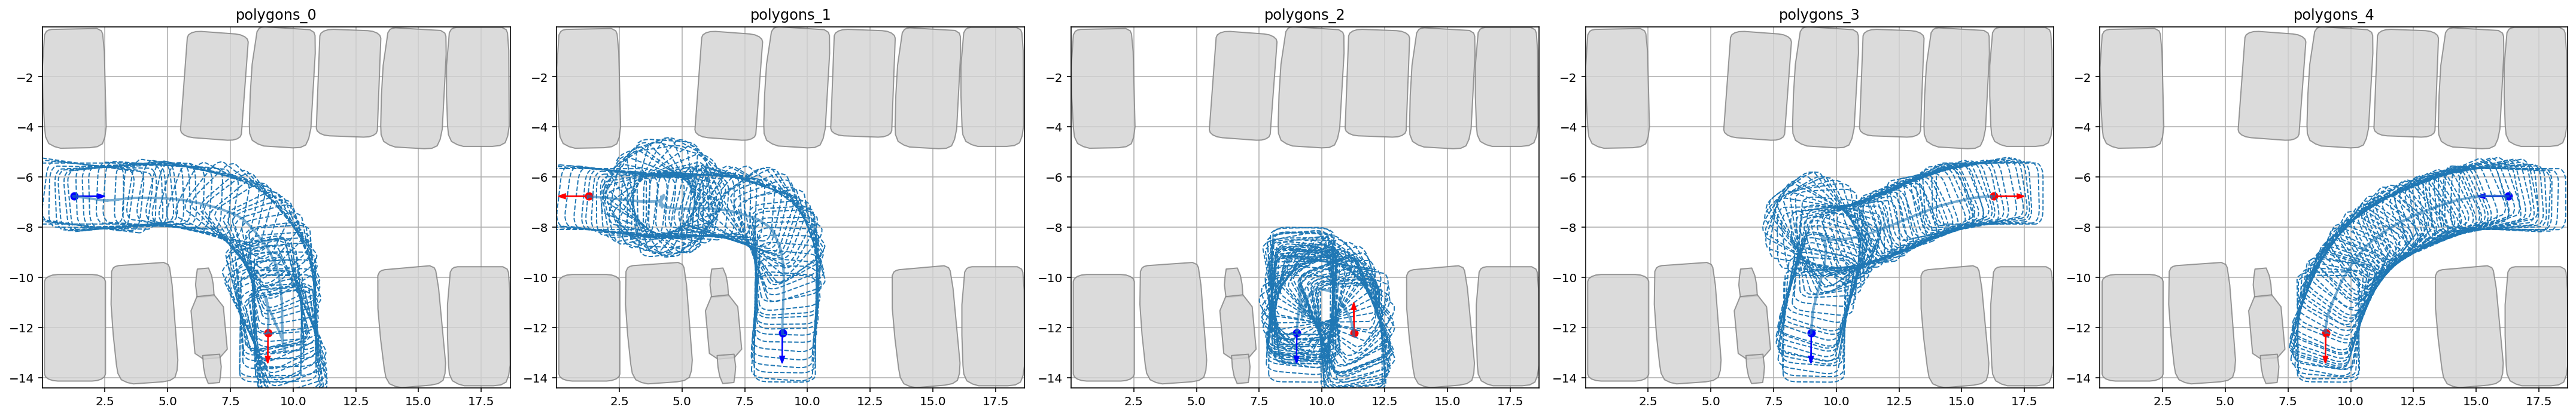

In [12]:
pool.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/polygon_experiment_pool.pdf",
                         num_colors=10)

Successfully merged [polygons/polygons_0_results.json, polygons/polygons_1_results.json, polygons/polygons_2_results.json, polygons/polygons_3_results.json, polygons/polygons_4_results.json] into corridors_result.json.
Visualizing corridors_result.json...


/home/mikhail/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/mikhail/.local/lib/python3.6/site-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


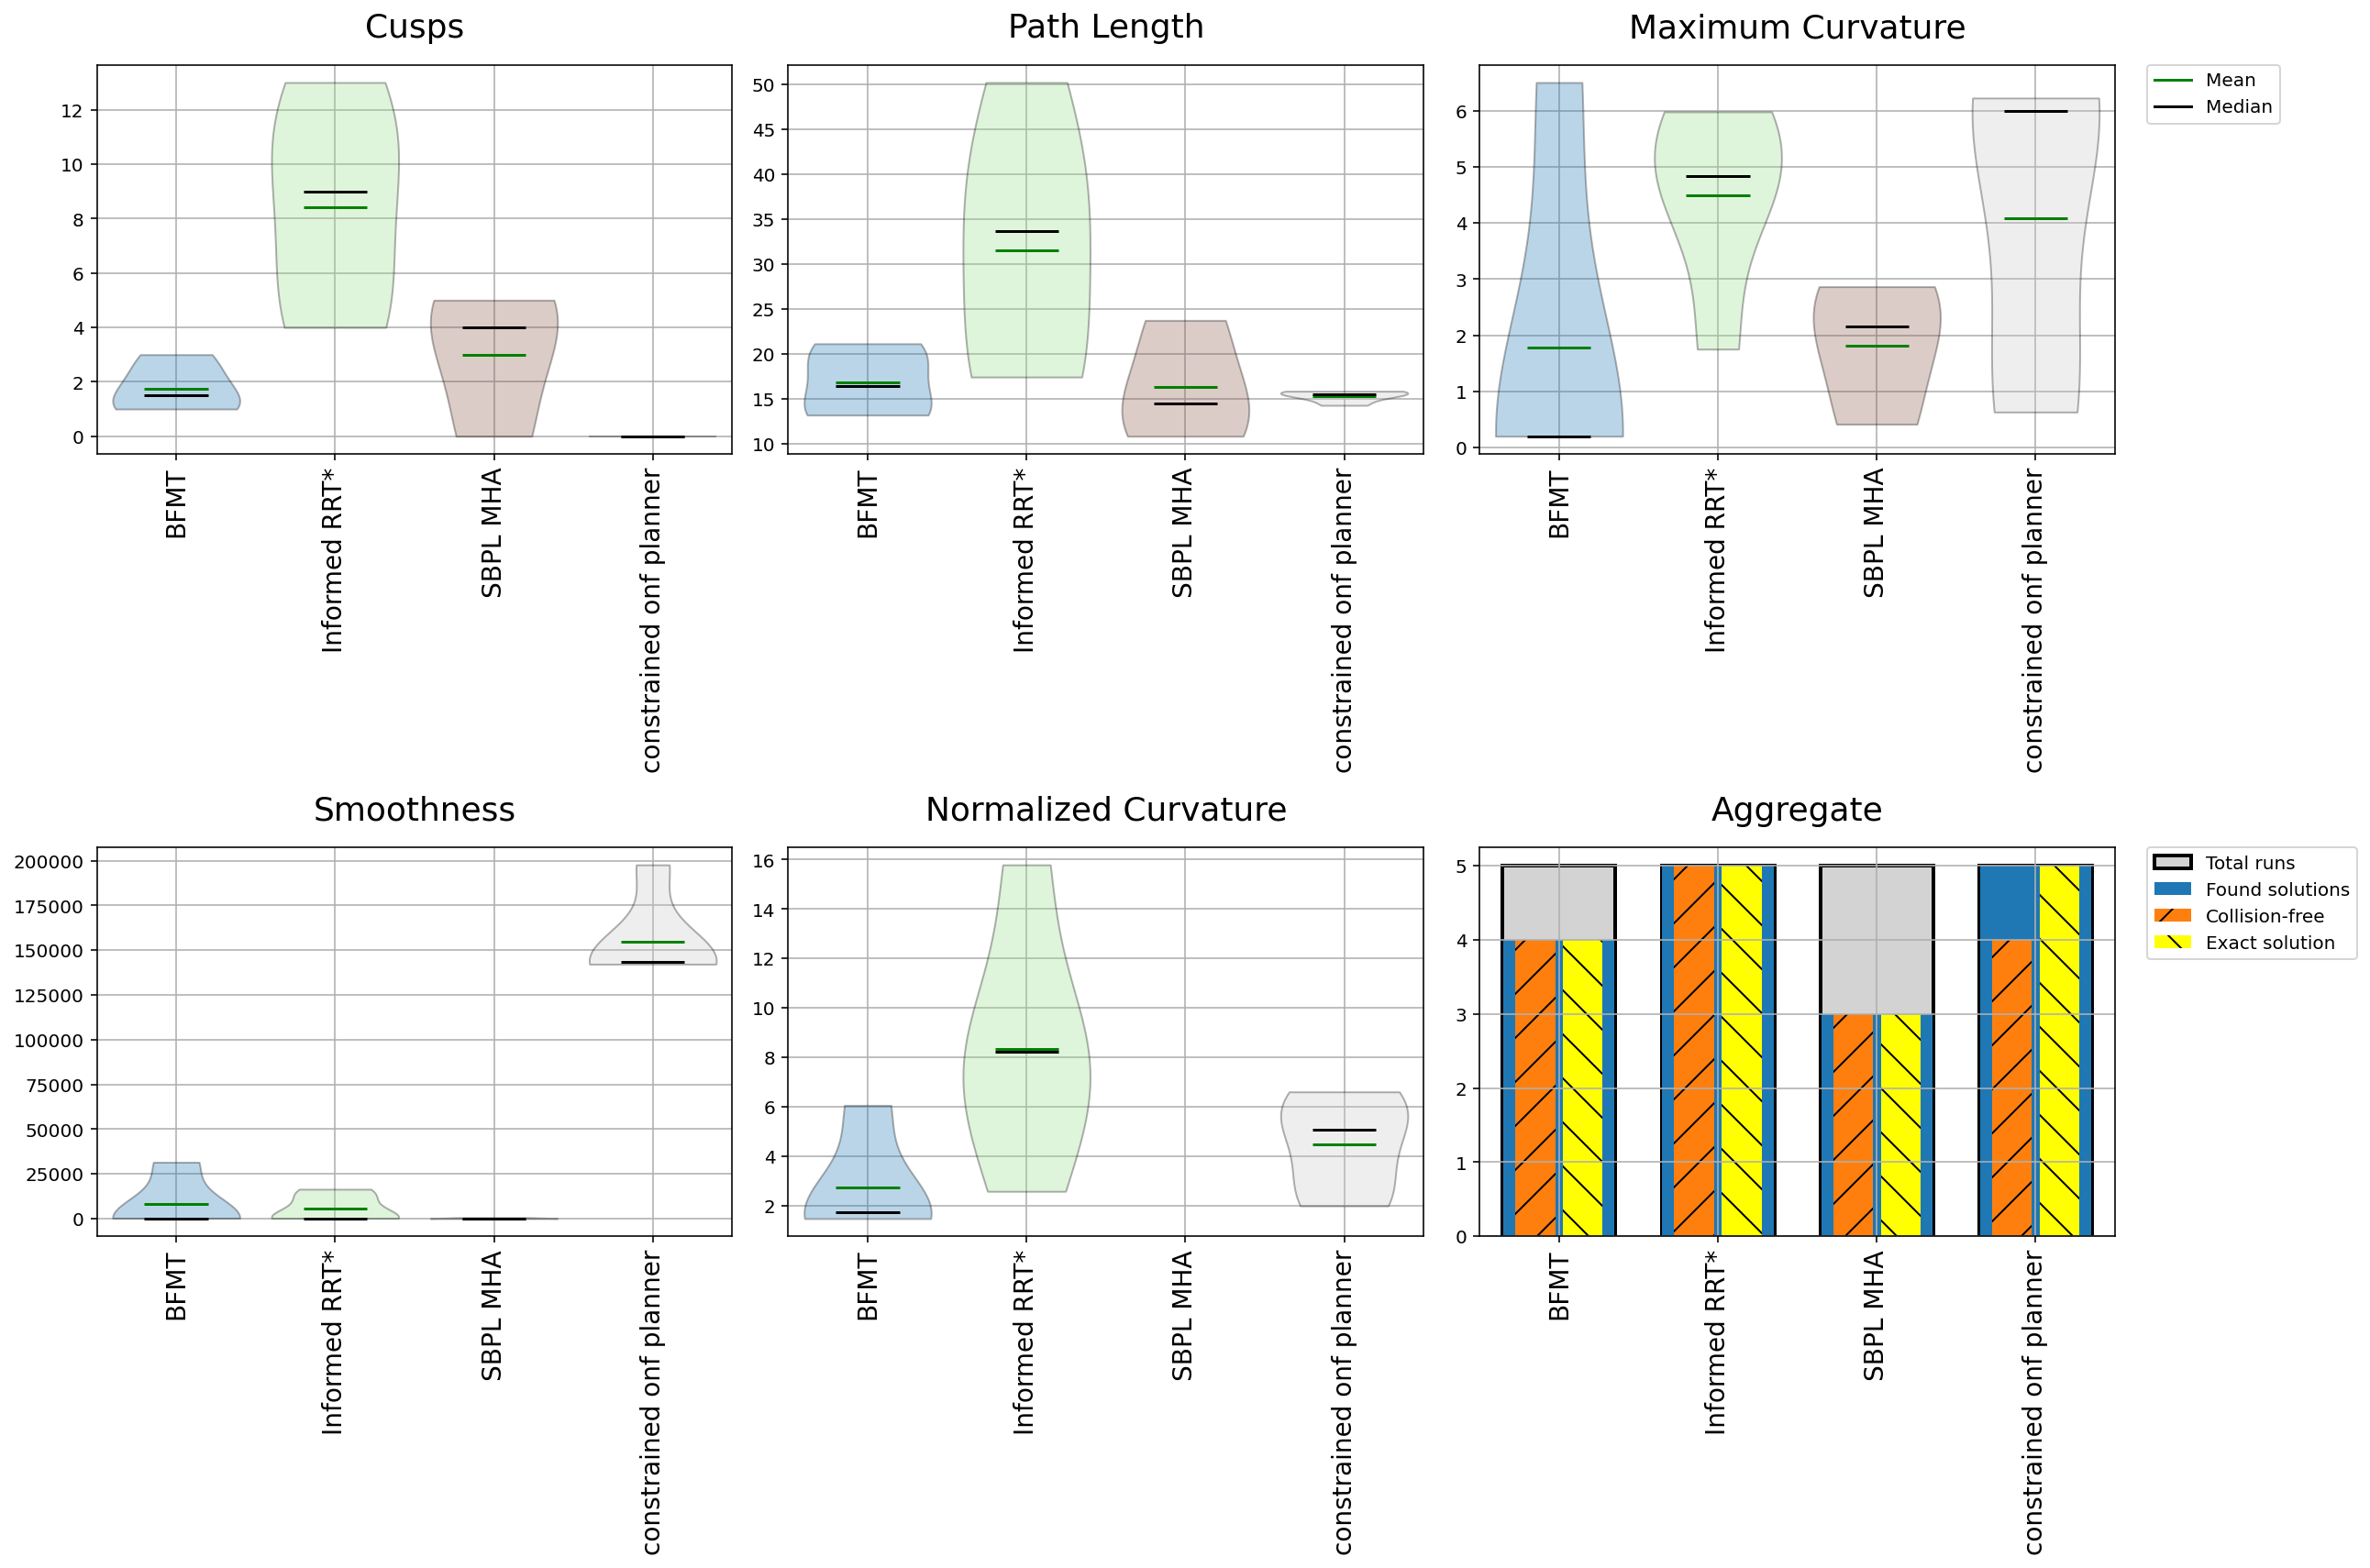

In [32]:
result = "corridors_result.json"
pool.merge(result, make_separate_runs=True)
plot_planner_stats(result, metrics="cusps, path_length, max_curvature, smoothness, normalized_curvature, aggregate")